<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793146/blob/main/Semana7_A01793146.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


## Alejandro Jesús Vázquez Navarro
## A01793146
## Ciencia de Datos
## Profesora: María de la Paz Rico Fernández
## 25 de octubre de 2022

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

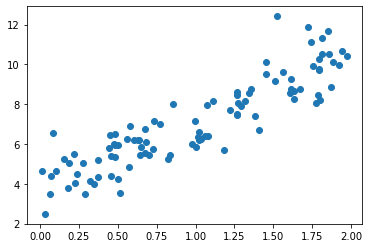

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

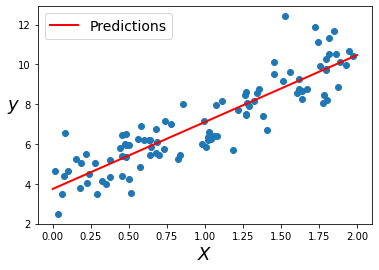

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

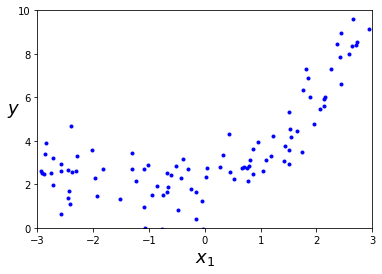

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

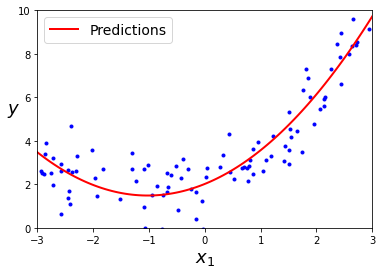

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

# to make this notebook's output stable across runs
np.random.seed(42)



df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
# Creación de listas vacías para acumular los errores por modelo

modelo_errores = list()


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

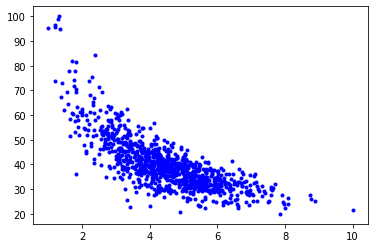

In [25]:
plt.plot(X,y,'b.')

1. Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).



In [26]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

**Regresión Múltiple Lineal.**
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


**Modelo generado (ecuación)**

In [27]:
#lineal
#1) Modelo generado


linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
y_new = linear_reg.predict(X_test)
linear_reg.coef_, linear_reg.intercept_


(array([-5.98882699]), 66.83650741226988)

La ecuación del modelo generado es:

$\hat{y} = -5.98X + 66.83$

**Visualización**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


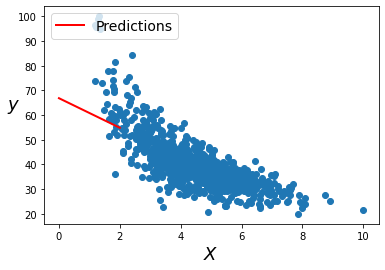

In [28]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)

y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

 **Errores y r cuadrada**

In [29]:
yhat = linear_reg.predict(X)

MAE = metrics.mean_absolute_error(y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(y, yhat))
R2 =  r2_score(y, yhat)

print('Error medio Absoluto (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('r2_score', R2)

modelo_errores.append({"Modelo": "Regresión lineal", 
                      "MAE":MAE, 
                      "RMSE":RMSE, 
                      "R2":R2} )



Error medio Absoluto (MAE): 4.916157669501609
Root Mean Squared Error: 6.871732567895417
r2_score 0.5789451031995518


**Regresión Polinomial**
Realiza la regresión polinomial: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


**Modelo generado (ecuación)**

In [30]:
# Debido a que el dataframe solo tiene 2 columnnas se puede utilizar polynomial features para agregar el cuadrado de cada característica


from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features  = poly.fit_transform(X)

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)

poly_reg_model.coef_, poly_reg_model.intercept_

(array([-16.82425278,   1.17336718]), 89.73719677939121)

Dados los resultados anteriores, la ecuación del modelo polinomial es:

$\hat{y} =  -16.82X +1.17X^2 + 89.73$

**Visualización**



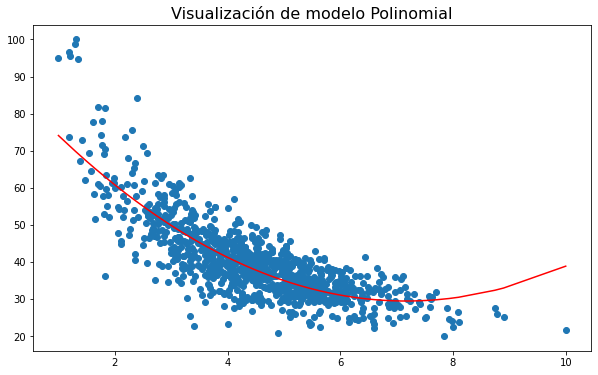

In [31]:

y_predicted = poly_reg_model.predict(poly_features)

plt.figure(figsize=(10, 6))
plt.title("Visualización de modelo Polinomial", size=16)
plt.scatter(X, y)
plt.plot(X, y_predicted, c="red")
plt.show()

**Errores y r cuadrada**



In [32]:
yhat = poly_reg_model.predict(poly_features)

MAE = metrics.mean_absolute_error(y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(y, yhat))
R2 =  r2_score(y, yhat)

print('Error medio Absoluto (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('r2_score', R2)

modelo_errores.append({"Modelo": "Regresión Polinomial", 
                      "MAE":MAE, 
                      "RMSE":RMSE, 
                      "R2":R2} )


Error medio Absoluto (MAE): 4.538765565228896
Root Mean Squared Error: 6.129173450227568
r2_score 0.6650268116056028


Realiza la regresión con **Ridge** y **Lasso**. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

**RIDGE**
**Modelo generado (ecuación)**

In [33]:
#RIDGE
#1) Modelo generado

from sklearn.linear_model import Ridge

ridge_reg = Ridge(fit_intercept=True)

ridge_reg.fit(X_train, y_train)

y_new = ridge_reg.predict(X_test)

ridge_reg.coef_, ridge_reg.intercept_

(array([-5.98505893]), 66.81965008652344)

Dados los resultados anteriores, la ecuación del modelo RIDGE es:

$\hat{y} =  -5.98X + 66.81$

**Visualización**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


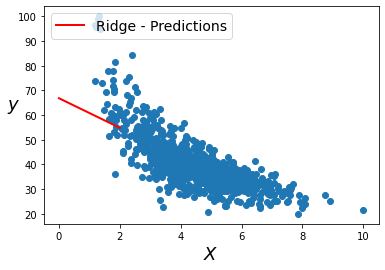

In [34]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)

y_fit = ridge_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Ridge - Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores y r cuadrada**

In [35]:
yhat = ridge_reg.predict(X)

MAE = metrics.mean_absolute_error(y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(y, yhat))
R2 =  r2_score(y, yhat)

print('Error medio Absoluto (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('r2_score', R2)

modelo_errores.append({"Modelo": "Ridge", 
                      "MAE":MAE, 
                      "RMSE":RMSE, 
                      "R2":R2} )


Error medio Absoluto (MAE): 4.9157461235413615
Root Mean Squared Error: 6.871777978486941
r2_score 0.5789395382521632


**LASSO**
**Modelo generado (ecuación)**

In [36]:
#LASSO
#1) Modelo generado

from sklearn.linear_model import Lasso

lasso_reg = Lasso(fit_intercept=True)

lasso_reg.fit(X_train, y_train)

y_new = lasso_reg.predict(X_test)

lasso_reg.coef_, lasso_reg.intercept_

(array([-5.42220651]), 64.30159616857074)

Dados los resultados anteriores, la ecuación del modelo LASSO es:

$\hat{y} =  -5.42X + 64.3$

**Visualización**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


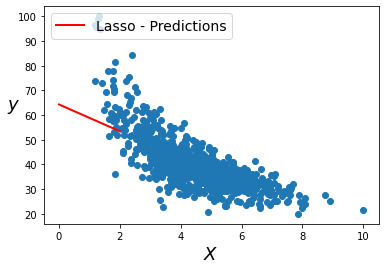

In [37]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)

y_fit = lasso_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Lasso - Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores y r cuadrada**

In [38]:
yhat = lasso_reg.predict(X)

MAE = metrics.mean_absolute_error(y, yhat)
RMSE = np.sqrt(metrics.mean_squared_error(y, yhat))
R2 =  r2_score(y, yhat)

print('Error medio Absoluto (MAE):', MAE)
print('Root Mean Squared Error:', RMSE )
print('r2_score', R2)

modelo_errores.append({"Modelo": "Lasso", 
                      "MAE":MAE, 
                      "RMSE":RMSE, 
                      "R2":R2} )


Error medio Absoluto (MAE): 4.879889819790469
Root Mean Squared Error: 6.919786080678711
r2_score 0.5730357022798069


Finalmente grafica :
- MAE (de los cuatro métodos)
- R2 (de los cuatro métodos)

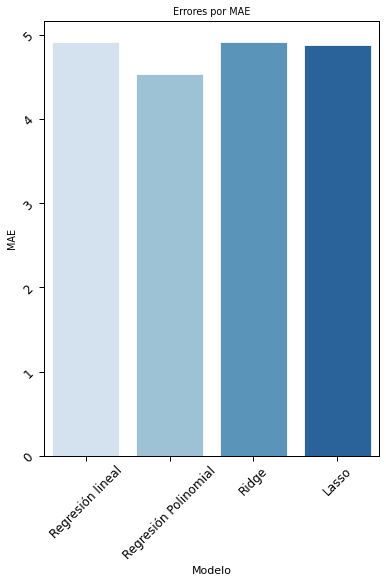

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

dfErrores = pd.DataFrame(modelo_errores)

sns.set_context('paper')
f, ax = plt.subplots(figsize = (6,8))

sns.barplot(data=dfErrores, x='Modelo', y='MAE',  palette = 'Blues', edgecolor = 'w').set(title="Errores por MAE")
plt.xlabel('Modelo', fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=12,   rotation=45)


plt.show()



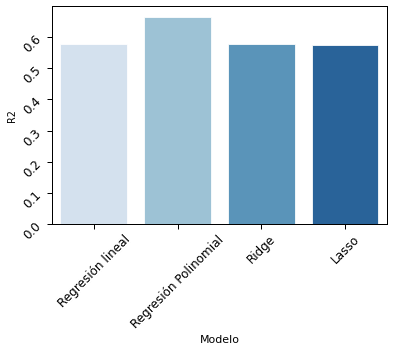

In [40]:
sns.barplot(data=dfErrores, x='Modelo', y='R2', palette = 'Blues', edgecolor = 'w')
plt.xlabel('Modelo', fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=12,   rotation=45)


**Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**


En realidad ningún método es conveniente debido a sus métricas de error. Solamente la **regresión polinomial** pudo superar el **0.66** aún así, este valor continua siendo **poco performante y por lo tanto no es bueno** pues solo explica el 66% de la varianza. No es un valor que nos pueda ofrecer poder predictivo pues sabemos que los modelos polinomiales tienden al sobreentrenamiento. Habría que hacer las pruebas pertinentes para poderlo confirmar.

Los errores poco performantes tienen sentido pues **no se realizó ninguna labor de afinamiento de hiperparámetros** ni mucho menos una validación cruzada. Son modelos sencillos.

Sin embargo, por las tareas anteriores, **sí podríamos tomar la regresión Ridge y Lasso** como modelos para poder hacer la predicción y tomar la regresión lineal como base comparativa. Esto porque la regresión Ridge y Lasso penalizan los coeficientes y con una afinación de parámetros podríamos jugar con el valor del hiperparámetro **alfa** y nuevamente medir los errores para poder llegar a conclusiones más finas.

Los porcentajes que se tomaron fueron 90% entrenamiento vs 10% de pruebas. 

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
18849,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
19369,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
20164,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
7139,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [43]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


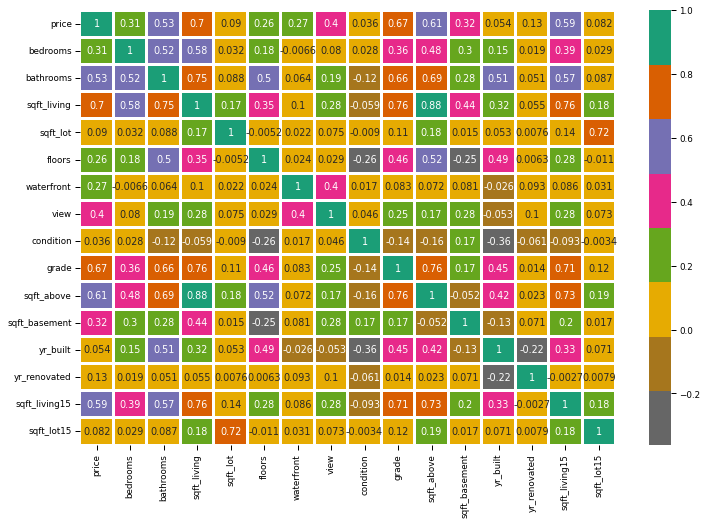

In [45]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [46]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [48]:
#tu codigo aquí

Encuentra el mejor regresor para los datos de las casas:



Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).


**Regresión Múltiple Lineal**


**Modelo generado (ecuación), sus errores y r cuadrada.**

**Regresión Múltiple Polinomial**

**Modelo generado (ecuación), sus errores y r cuadrada.**

**RIDGE**

**Ecuación de tu modelo, errores y r cuadrada**

**LASSO**

**Ecuación de tu modelo, errores y r cuadrada**

**Gráfica de los errores**

- MAE (de los cuatro métodos)
- R2 (de los cuatro métodos)

Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

**Conclusiones:**